# <font color='red'>1 - </font> Getting Data

In [ ]:
path = "../dataset/data/"

Path to dataset files: ../dataset/data/


In [60]:
import pandas as pd
import glob

for file_path in glob.glob(path + "*.csv"):
    print(file_path)

df = pd.read_csv("../dataset/data/dataset-tickets-multi-lang3-4k.csv").fillna(0)

df.head()

../dataset/data/aa_dataset-tickets-multi-lang-5-2-50-version.csv
../dataset/data/dataset-tickets-german_normalized.csv
../dataset/data/dataset-tickets-german_normalized_50_5_2.csv
../dataset/data/dataset-tickets-multi-lang-4-20k.csv
../dataset/data/dataset-tickets-multi-lang3-4k.csv


,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,0,0,0,0.0
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,0,0,0,0.0
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,0,0,0,0.0
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,0,0.0
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,0,0,0,0.0


# <font color='red'>2 - </font> Data Analysis

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        4000 non-null   object 
 1   body           4000 non-null   object 
 2   answer         4000 non-null   object 
 3   type           4000 non-null   object 
 4   queue          4000 non-null   object 
 5   priority       4000 non-null   object 
 6   language       4000 non-null   object 
 7   business_type  4000 non-null   object 
 8   tag_1          4000 non-null   object 
 9   tag_2          4000 non-null   object 
 10  tag_3          4000 non-null   object 
 11  tag_4          4000 non-null   object 
 12  tag_5          4000 non-null   object 
 13  tag_6          4000 non-null   object 
 14  tag_7          4000 non-null   object 
 15  tag_8          4000 non-null   object 
 16  tag_9          4000 non-null   float64
dtypes: float64(1), object(16)
memory usage: 531.4+ KB


Text(0, 0.5, 'Number of tickets')

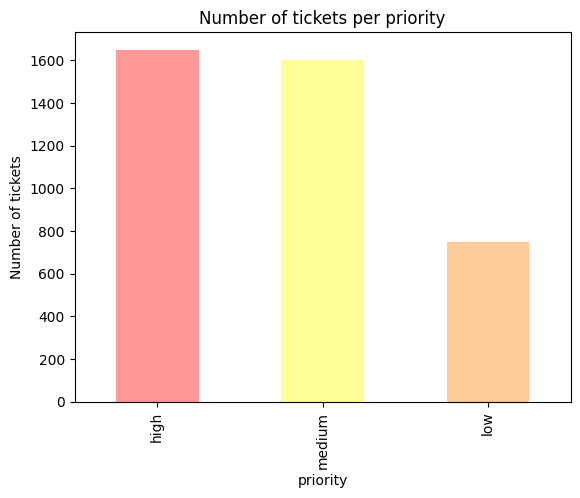

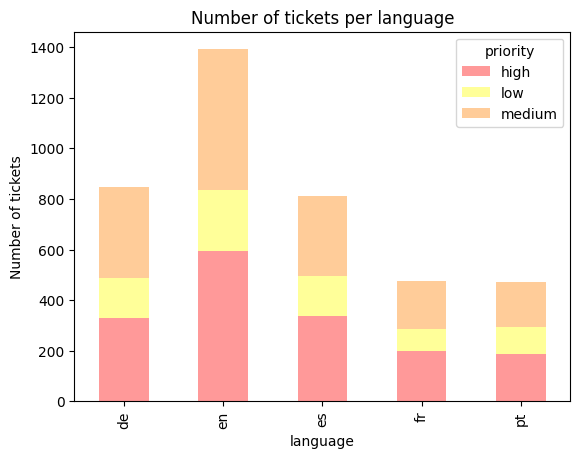

In [62]:
import matplotlib.pyplot as plt

counts = df['priority'].value_counts()[['high', 'medium', 'low']]
counts.plot(kind="bar", stacked=True, color=['#ff9999', '#ffff99', '#ffcc99', ] )
plt.title("Number of tickets per priority")
plt.ylabel("Number of tickets")

counts = df.groupby(['language', 'priority']).size().unstack(fill_value=0)
counts.plot(kind="bar", stacked=True, color=['#ff9999', '#ffff99', '#ffcc99', ] )
plt.title("Number of tickets per language")
plt.ylabel("Number of tickets")

Text(0.5, 0, 'Number of tickets')

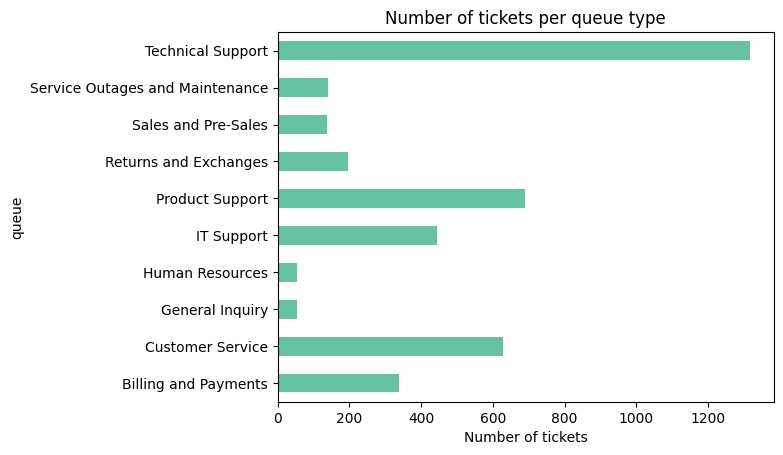

In [63]:
counts = df.groupby(['queue']).size()
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Number of tickets per queue type")
plt.xlabel("Number of tickets")

Text(0.5, 0, 'Number of tickets')

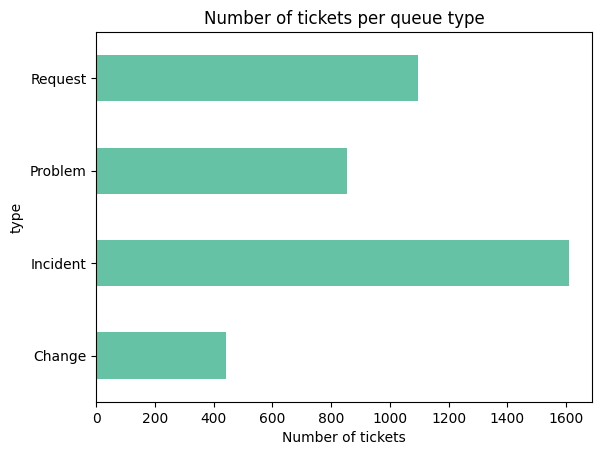

In [64]:
counts = df.groupby(['type']).size()
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Number of tickets per queue type")
plt.xlabel("Number of tickets")

Text(0.5, 0, 'Number of tickets')

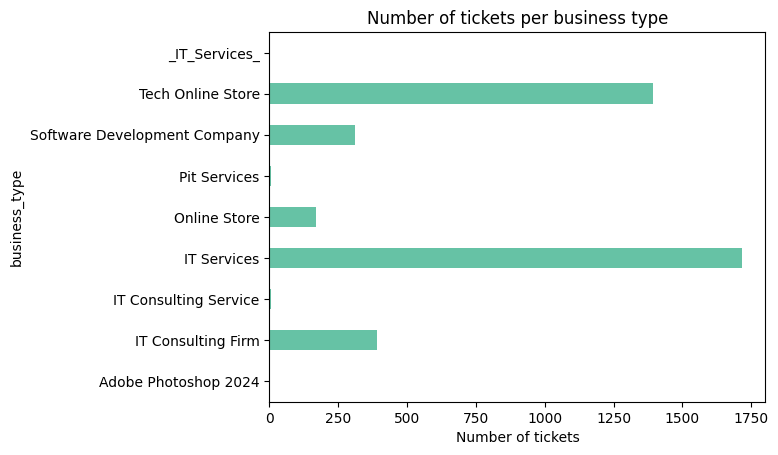

In [65]:
counts = df.groupby(['business_type']).size()
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Number of tickets per business type")
plt.xlabel("Number of tickets")

# <font color='red'>3 - </font> Training

In [152]:
X = df["body"].values.astype(str).reshape(-1)
y = df["priority"].values

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(X)

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [155]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

predictions = model.predict(X_test)

# <font color='red'>4 - </font> Evaluation

In [150]:
from sklearn.metrics import f1_score, accuracy_score

print("F1 score is: ", f1_score(y_test, predictions, average="weighted"))
print("Accuracy score is: ", accuracy_score(y_test, predictions))

F1 score is:  0.7460226609852598
Accuracy score is:  0.746


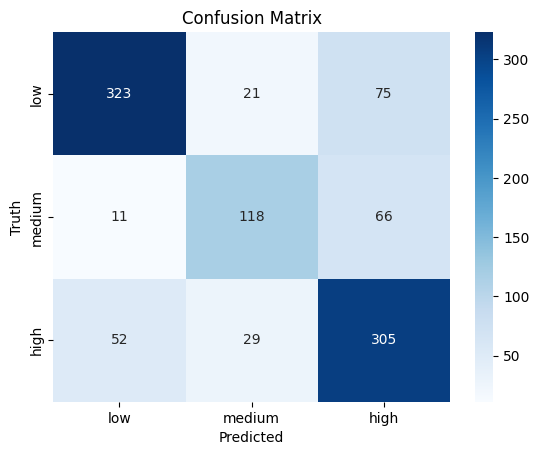

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
classes = ["low", "medium", "high"]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()